In [59]:
 
from keras.utils import np_utils 
from keras.datasets import mnist 
import numpy as np 
import seaborn as sns
from keras.layers.normalization import BatchNormalization
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout

%matplotlib inline

In [160]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_Org=X_train.copy()
X_test_org=X_test.copy()

In [155]:
#Utility functions used in this noterbook

print('\x1b[1;03;55;55m')
def plot(x,vy,ty,title):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss') 
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.title(title)
    plt.legend()
    plt.grid()
    fig.canvas.draw()

#build model - by this method we will be able to compile a model by passing 
#different values asked in the parameter of the method

#Architecture
# If layers=3, dropout=1 and batchnormal=2

#denselayer1(128,input=784)
#batchnormal1
#Dropout1

#denselayer2(256)
#batchnormal2

#Denselayer3(10(outputclass))


def build_model(activation,epoch,batchNormal,dropOut,optimizer,batchSize,layers,outputClass):
    model = Sequential()     
    dataResult['DropOut'].append(dropOut)    
    dataResult['BatchNormal'].append(batchNormal) 
    title="Layers "+str(layers)+", BatchNormalization "+str(batchNormal)+", Dropout "+str(dropOut)+", Activation "+str(activation)+", Optmization "+str(optimizer)

    input_dim=X_train.shape[1]
    j=128
    h=0
    for i in range(0,layers):
        
        if(layers==1):
            model.add(Dense(outputClass, input_dim=input_dim, activation='softmax'))       
        else:
            if(i==0):  
                model.add(Dense(j, input_dim=input_dim, activation=activation))
            elif(layers-i==1):  
                model.add(Dense(outputClass, activation='softmax'))
            else:  
                model.add(Dense(j,activation=activation))
                
        if(batchNormal>0):
            model.add(BatchNormalization())
        
        if(dropOut>0):
            model.add(Dropout(0.4))
        
        batchNormal=batchNormal-1
        dropOut=dropOut-1
        j=j*2; 
        
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=epoch, verbose=0, validation_data=(X_test, Y_test)) 
    score,acc_score = model.evaluate(X_test, Y_test, verbose=0)
 
    dataResult['epoch'].append(epoch)
    dataResult['Activation'].append(activation)
    dataResult['Layers'].append(layers)
    dataResult['TestScore'].append(score)
    dataResult['TestAcc'].append(acc_score)
    
    x = list(range(1,epoch+1))   
    vy = history.history['val_loss']
    ty = history.history['loss']
    plot(x, vy,ty,title)
    return model

In [3]:
print('\x1b[1;03;55;55m')
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))
print()
print("Unique labels in train :",np.unique(y_train))
print("Unique labels in test :",np.unique(y_test)) 



Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)

Unique labels in train : [0 1 2 3 4 5 6 7 8 9]
Unique labels in test : [0 1 2 3 4 5 6 7 8 9]


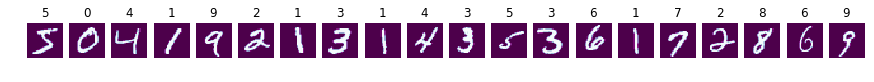

In [4]:
#Visualize the data
fig1, ax1 = plt.subplots(1,20, figsize=(15,10))
for i in range(20):
    ax1[i].imshow(X_train[i], cmap="BuPu_r") 
    ax1[i].axis('off')
    ax1[i].set_title(y_train[i])

In [166]:
# the input shape its 3 dimensional vector 
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

print('\x1b[1;03;55;55m')
print("Shape of new train dataframe:", X_train.shape )
print("Shape of new test dataframe:", X_test.shape )


Shape of new train dataframe: (60000, 784)
Shape of new test dataframe: (10000, 784)


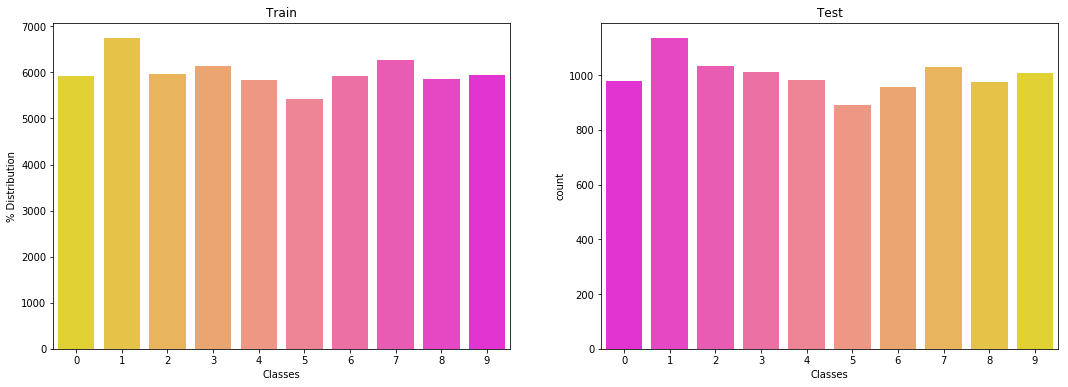


Distribution of Classes
+---------+-----------------+----------------+
|  CLASS  |  TRAIN_PERCENT  |  TEST_PERCENT  |
+---------+-----------------+----------------+
|    1    |      11.24      |     11.35      |
|    7    |      10.44      |     10.28      |
|    3    |      10.22      |      10.1      |
|    2    |       9.93      |     10.32      |
|    9    |       9.92      |     10.09      |
|    0    |       9.87      |      9.8       |
|    6    |       9.86      |      9.58      |
|    8    |       9.75      |      9.74      |
|    4    |       9.74      |      9.82      |
|    5    |       9.04      |      8.92      |
+---------+-----------------+----------------+


In [63]:
train_label= (pd.DataFrame(X_train))
train_label['Class']=y_train

test_label= (pd.DataFrame(X_test))
test_label['Class']=y_test

#Find distribution of numbers across train and test set

fig, axs = plt.subplots(1,2,figsize=(18,6)) 
pl0=sns.countplot(x='Class', data=train_label,palette='spring_r',ax=axs[0])
axs[0].set(xlabel='Classes', 
       ylabel='% Distribution',title='Train')

pl1=sns.countplot(x='Class', data=test_label,palette='spring',ax=axs[1])
axs[1].set(xlabel='Classes',title='Test')
 
plt.legend();
plt.show();

#Both the dataset follows almost same distribution 

print('\x1b[1;03;55;55m')
print("Distribution of Classes")
col_name="Class"
values_count_tr = pd.DataFrame(train_label[col_name].value_counts())    
values_count_tr.columns = ['Train_count'] 
values_count_tr[col_name] = [ str(i) for i in values_count_tr.index ]
values_count_tr['Train_percent'] = values_count_tr['Train_count'].div(values_count_tr['Train_count'].sum()).multiply(100).round(2) 
 

values_count_te = pd.DataFrame(test_label[col_name].value_counts())    
values_count_te.columns = ['Test_count'] 
values_count_te[col_name] = [ str(i) for i in values_count_te.index ]
values_count_te['Test_percent'] = values_count_te['Test_count'].div(values_count_te['Test_count'].sum()).multiply(100).round(2) 
 
result_count=pd.merge(values_count_tr, values_count_te,on='Class', how='left')

result_count= result_count.reindex_axis([col_name,'Train_percent','Test_percent'],axis=1)
result_count.reset_index(drop=True,inplace=True) 

x =  PrettyTable(header_style='upper', padding_width=2)     
for col in result_count.columns:
    x.add_column(column=result_count[col],fieldname=col)
print(x) 

#We can see that the distribution is almost same

In [167]:
# Normalize the data
print('\x1b[1;03;55;55m')

X_train = X_train/255
X_test = X_test/255


# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector 
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])


Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


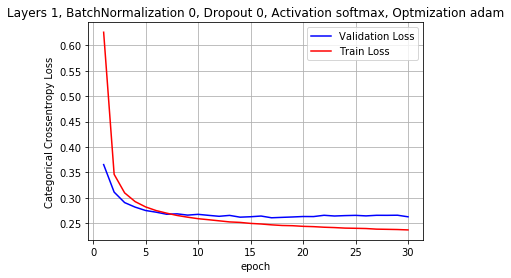

In [103]:
dataResult = {"Activation":[], "Layers":[], "DropOut":[] , 'BatchNormal':[],'epoch':[],'TestScore':[],'TestAcc':[]} 

build_model('softmax',30,0,0,'adam',100,1,10)

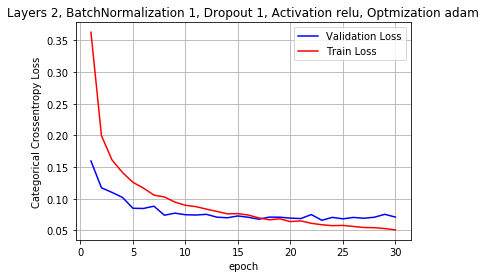

In [104]:
build_model(activation='relu',epoch=30,batchNormal=1,dropOut=1,optimizer='adam',batchSize=100,layers=2,outputClass=10)

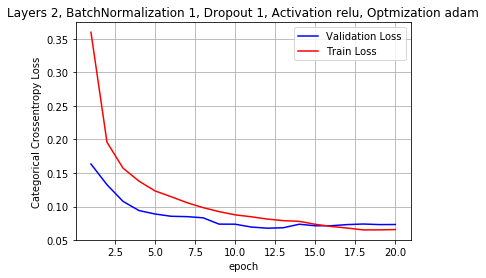

In [105]:
build_model(activation='relu',epoch=20,batchNormal=1,dropOut=1,optimizer='adam',batchSize=100,layers=2,outputClass=10)

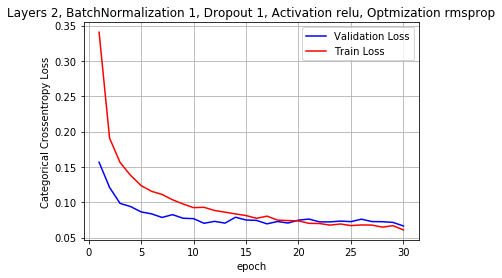

In [106]:
build_model(activation='relu',epoch=30,batchNormal=1,dropOut=1,optimizer='rmsprop',batchSize=100,layers=2,outputClass=10)

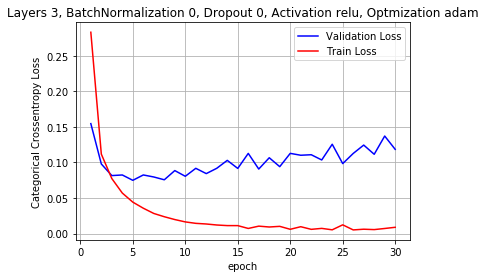

In [150]:
build_model(activation='relu',epoch=30,batchNormal=0,dropOut=0,optimizer='adam',batchSize=100,layers=3,outputClass=10)

Here, we have not kept batchnormal and dropout layers, so we can see that the model fits to the train data- but for test it shows higher loss.

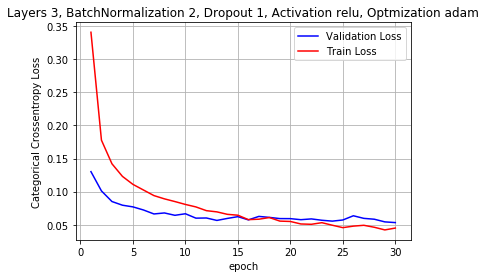

In [107]:
build_model(activation='relu',epoch=30,batchNormal=2,dropOut=1,optimizer='adam',batchSize=100,layers=3,outputClass=10)

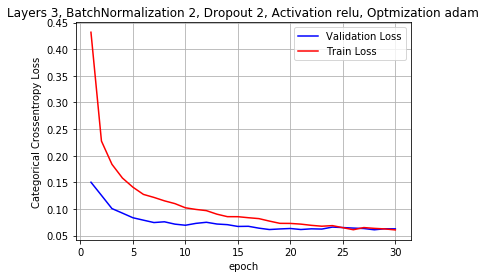

In [108]:
build_model(activation='relu',epoch=30,batchNormal=2,dropOut=2,optimizer='adam',batchSize=100,layers=3,outputClass=10)

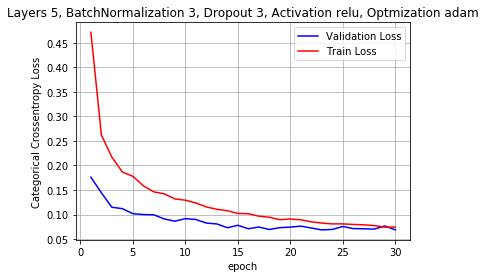

In [109]:
build_model(activation='relu',epoch=30,batchNormal=3,dropOut=3,optimizer='adam',batchSize=100,layers=5,outputClass=10)

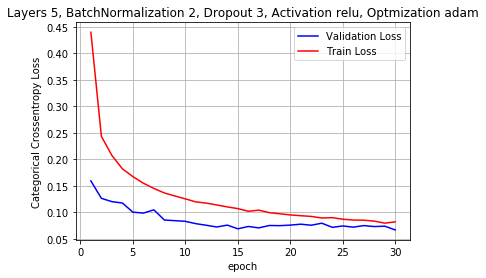

In [111]:
build_model(activation='relu',epoch=30,batchNormal=2,dropOut=3,optimizer='adam',batchSize=100,layers=5,outputClass=10)

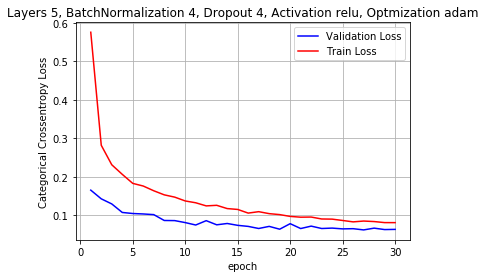

In [112]:
build_model(activation='relu',epoch=30,batchNormal=4,dropOut=4,optimizer='adam',batchSize=100,layers=5,outputClass=10)

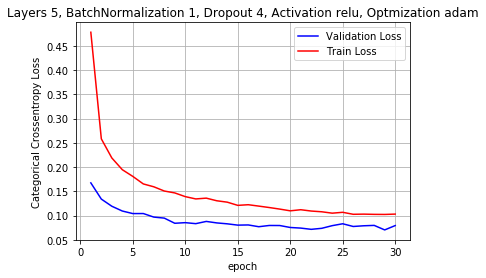

In [113]:
build_model(activation='relu',epoch=30,batchNormal=1,dropOut=4,optimizer='adam',batchSize=100,layers=5,outputClass=10)

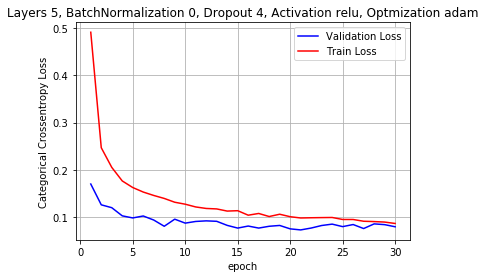

In [114]:
build_model(activation='relu',epoch=30,batchNormal=0,dropOut=4,optimizer='adam',batchSize=100,layers=5,outputClass=10)

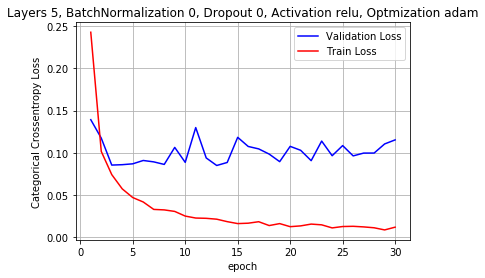

In [115]:
build_model(activation='relu',epoch=30,batchNormal=0,dropOut=0,optimizer='adam',batchSize=100,layers=5,outputClass=10)

Same as in 3 layers in 5 layers also when we remove batchnormal and dropout layers, the model fits tothe train data- but for test it shows higher loss.

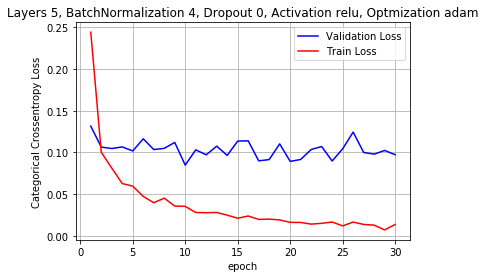

In [116]:
build_model(activation='relu',epoch=30,batchNormal=4,dropOut=0,optimizer='adam',batchSize=100,layers=5,outputClass=10)

when we remove dropout layer and keep only the batchnormal, then also the results are quite disappointing showing that dropout layer is needed for better performance.

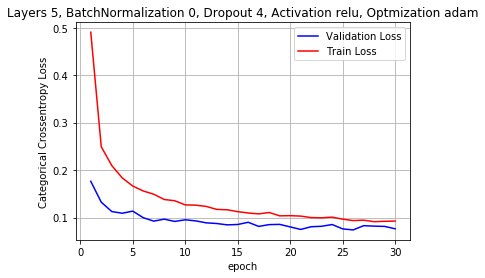

In [117]:
build_model(activation='relu',epoch=30,batchNormal=0,dropOut=4,optimizer='adam',batchSize=100,layers=5,outputClass=10)

In [151]:

print('\x1b[1;03;55;55m')
temp=pd.DataFrame(dataResult)
temp=temp.sort_values(by='TestAcc',axis=0)
temp=temp.reset_index(drop=True)
x =  PrettyTable(header_style='upper', padding_width=2)     
for col in temp.columns:
    x.add_column(column=temp[col],fieldname=col)
print(x) 



+--------------+---------------+-----------+----------+-----------+------------------------+---------+
|  ACTIVATION  |  BATCHNORMAL  |  DROPOUT  |  LAYERS  |  TESTACC  |       TESTSCORE        |  EPOCH  |
+--------------+---------------+-----------+----------+-----------+------------------------+---------+
|   softmax    |       0       |     0     |    1     |   0.9278  |  0.26262605038136244   |    30   |
|     relu     |       1       |     1     |    2     |   0.9786  |  0.07313997523363214   |    20   |
|     relu     |       0       |     4     |    5     |   0.9787  |  0.08016193336397409   |    30   |
|     relu     |       0       |     4     |    5     |   0.9796  |  0.07624819789945614   |    30   |
|     relu     |       0       |     0     |    3     |   0.9796  |  0.11846815024482443   |    30   |
|     relu     |       1       |     4     |    5     |   0.9798  |  0.07943037753904646   |    30   |
|     relu     |       4       |     0     |    5     |   0.9803  |  0.0

<b>Above shown in the summary of all the models, with activation, number of batch normal layers, no of dropout layers and total number of hidden layers in this notebook.<br>
The resuts above are sorted based on accuracy.

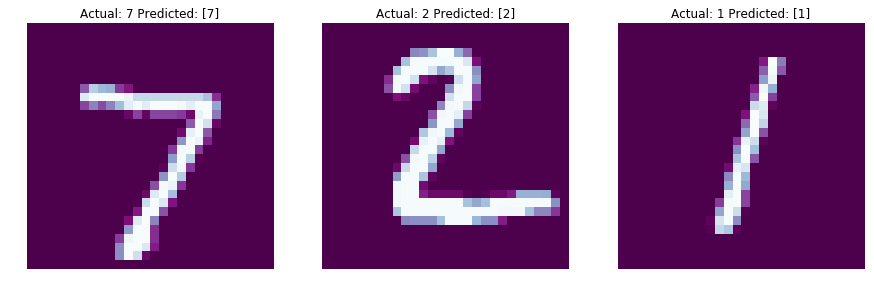

In [192]:
#Check on some of the test data - predict classes of the data point

model_l5_44=build_model(activation='relu',epoch=30,batchNormal=4,dropOut=4,optimizer='adam',batchSize=100,layers=5,outputClass=10)
 
fig1, ax1 = plt.subplots(1,3, figsize=(15,10))  
for i in range(3):
    ax1[i].imshow(X_test_org[i], cmap="BuPu_r") 
    ax1[i].axis('off') 
    predict=model_l5_44.predict_classes(np.matrix(X_test[i]))
    ax1[i].set_title("Actual: "+str(y_test[i])+" Predicted: "+str(predict) )
 